1. Name - Humera Bano
2. Github ID: humera811
3. USC ID - 7255691039

In [176]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc, f1_score, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import KFold, cross_val_score,  StratifiedKFold, GridSearchCV
from tqdm import tqdm
import xgboost as xgb
from sklearn.linear_model import BayesianRidge
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import Normalizer
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# __1. Tree-Based Methods__

## __a. Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks. The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.__

In [177]:
# path
aps_train_path = '../data/aps_failure_training_set.csv'
aps_test_path = '../data/aps_failure_test_set.csv'

In [178]:
aps_train = pd.read_csv(aps_train_path, skiprows=20, na_values = 'na') #header=None
aps_test = pd.read_csv(aps_test_path, skiprows=20, na_values = 'na')

aps_total = pd.concat([aps_train, aps_test])

In [179]:
aps_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [180]:
aps_train.shape

(60000, 171)

In [181]:
aps_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [182]:
aps_test.shape


(16000, 171)

### __(b) Data Preparation__

### __This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.__

In [183]:
aps_X = aps_train.drop(columns = 'class')
aps_Y = aps_train['class']
aps_test_X = aps_test.drop(columns = 'class')
aps_test_Y = aps_test['class']
print("Shape of train_X :",aps_X.shape ,"\nShape of test_X : ", aps_test_X.shape )

Shape of train_X : (60000, 170) 
Shape of test_X :  (16000, 170)


### __i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.__

There are many ways to handle missing values. Some of them are
- Remove samples that contain a missing value
- Replace missing values with a constant value that has meaning within the domain Ex: Categorical Features
- Replace missing values with a feature value from another randomly selected observation
- Replace missing values with a statistics such as mean, median or mode value of the feature/column.
- Expectation Maximization

In [184]:
aps_train_X = aps_train.iloc[:, 1:]
aps_train_Y = aps_train.iloc[:, 0]
aps_test_X = aps_test.iloc[:, 1:]
aps_test_Y = aps_test.iloc[:, 0]

__I am using Mean Data Imputation to replace missing value__

In [185]:
# https://scikit-learn.org/stable/modules/impute.html
imputer_mean = SimpleImputer(missing_values=np.nan)
# By default mean is used for the strategy
aps_train_X = pd.DataFrame(imputer_mean.fit_transform(aps_train_X), columns=aps_train.columns[1:])
aps_test_X = pd.DataFrame(imputer_mean.fit_transform(aps_test_X), columns=aps_test.columns[1:])

In [186]:
aps_train_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [187]:
aps_test_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.000000,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.000000,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,0.772065,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,0.772065,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,0.772065,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.000000,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,0.772065,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,0.772065,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


Not combining training and testing data right now as to keep testing data away from influence of training data

__2) Using Iterative Imputation - Sklearn IterativeImputer was inspired by the R MICE package but differs from it by returning a single imputation instead of multiple imputations.__

In [188]:
# imputer = IterativeImputer(estimator = BayesianRidge(), n_nearest_features=None)

# # fit and transform the dataset
# aps_X_imps = imputer.fit_transform(aps_X)
# aps_test_X_imps = imputer.fit_transform(aps_test_X)

In [189]:
# aps_X_imp = pd.DataFrame(aps_X_imps, columns= aps_X.columns)
# aps_X_imp

In [190]:
# aps_test_X_imp = pd.DataFrame(aps_test_X_imps, columns= aps_test_X.columns)
# aps_test_X_imp

__Observation : IterativeImputer took more time to process than Simple Imputer__

### __ii. For each of the 170 features, calculate the coefficient of variation CV =  s/m, where s is sample standard deviation and m is sample mean.__

In [191]:
df_imputed = np.concatenate((aps_train_X, aps_test_X), axis = 0)
df_imputed = pd.DataFrame(df_imputed,columns=aps_train.columns[1:])
df_imputed

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.772065,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.000000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.772065,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.772065,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [192]:
df_stats = df_imputed.describe()
df_stats

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,7.600000e+04,76000.000000,7.600000e+04,7.600000e+04,76000.000000,76000.000000,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,...,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,7.600000e+04,76000.000000,76000.000000
mean,6.115976e+04,0.725584,3.564406e+08,1.505825e+05,6.736860,10.836109,2.004200e+02,1.204876e+03,9.697877e+03,9.365156e+04,...,4.495789e+05,2.132474e+05,4.506510e+05,4.006248e+05,3.378721e+05,3.475620e+05,1.398975e+05,8.425007e+03,0.085187,0.219056
std,2.647366e+05,1.580609,7.726379e+08,3.113848e+07,150.191552,197.318616,1.833152e+04,5.070160e+04,1.709244e+05,8.197386e+05,...,1.170523e+06,5.487443e+05,1.183134e+06,1.145079e+06,1.091658e+06,1.697870e+06,4.665610e+05,4.847679e+04,4.082618,9.999582
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.600000e+02,0.713189,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.082000e+03,1.230000e+03,2.895500e+03,3.900000e+03,5.820000e+02,1.220000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.081300e+04,0.713189,1.900000e+02,2.900000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.412340e+05,1.154270e+05,2.299000e+05,1.976080e+05,1.008580e+05,4.383900e+04,4.498000e+03,0.000000e+00,0.000000,0.000000
75%,4.884000e+04,0.713189,1.728000e+03,1.228000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.454897e+05,2.181640e+05,4.673165e+05,4.029535e+05,2.843060e+05,1.740700e+05,1.392805e+05,2.328000e+03,0.000000,0.000000
max,4.294967e+07,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,1.047252e+07,1.914916e+07,7.305747e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,4.215944e+07,1.195801e+08,1.926740e+07,4.570398e+06,482.000000,1720.000000


In [193]:
# A coefficient of variation is a way to measure how spread out values are in a dataset relative to the mean.
cv_aps = df_imputed.apply(lambda column : np.abs(column.std() / column.mean()), axis=0)
cv_aps

aa_000      4.328608
ab_000      2.178397
ac_000      2.167648
ad_000    206.786809
ae_000     22.293998
             ...    
ee_007      4.885086
ee_008      3.335019
ee_009      5.753917
ef_000     47.925135
eg_000     45.648516
Length: 170, dtype: float64

In [194]:
df_cv = pd.DataFrame(columns=["Feature","Mean","Std","CV"])
df_idx=0
for col in df_imputed.columns:
    mean=df_stats.loc["mean",col]
    std=df_stats.loc["std",col]
    df_cv.loc[df_idx]=[col,mean,std,std/mean]
    df_idx+=1
df_cv

,Feature,Mean,Std,CV
0,aa_000,6.115976e+04,2.647366e+05,4.328608
1,ab_000,7.255835e-01,1.580609e+00,2.178397
2,ac_000,3.564406e+08,7.726379e+08,2.167648
3,ad_000,1.505825e+05,3.113848e+07,206.786809
4,ae_000,6.736860e+00,1.501916e+02,22.293998
...,...,...,...,...
165,ee_007,3.475620e+05,1.697870e+06,4.885086
166,ee_008,1.398975e+05,4.665610e+05,3.335019
167,ee_009,8.425007e+03,4.847679e+04,5.753917
168,ef_000,8.518742e-02,4.082618e+00,47.925135


### __iii. Plot a correlation matrix for your features using pandas or any other tool__

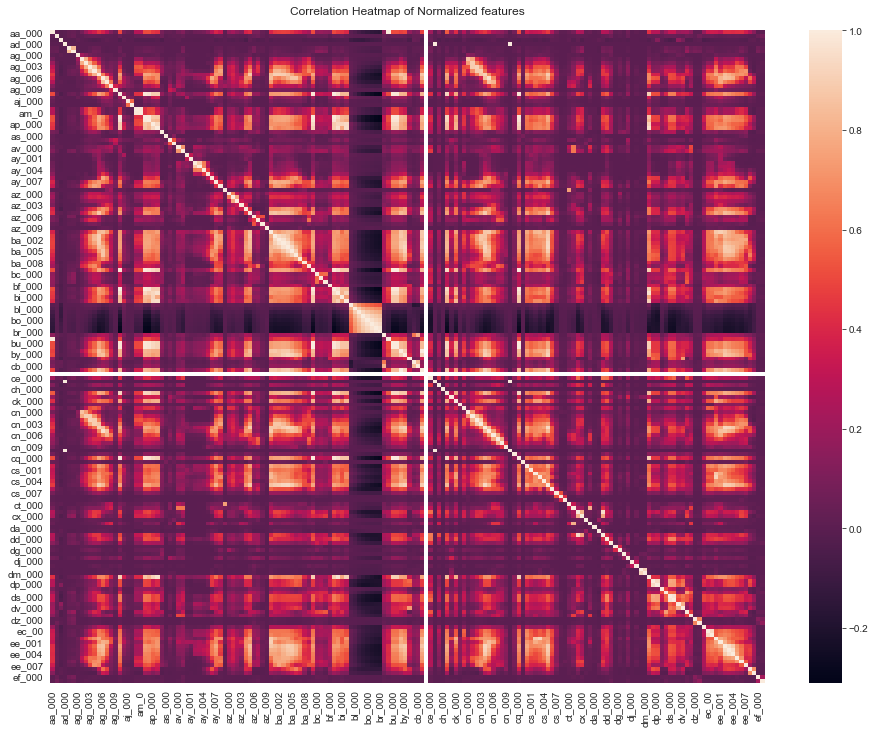

In [195]:
plt.close()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df_imputed.corr())
heatmap.set_title('Correlation Heatmap of Normalized features', fontdict={'fontsize':12}, pad=16);
plt.show()

- It is difficult to draw any conclusion regarding the significance of features using scatter plots

### __iv. Pick $\lfloor\sqrt{170}\rfloor$ features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.__

In [196]:
170**0.5

13.038404810405298

In [197]:
# Select features with best CV
no_of_features = int(np.floor(np.sqrt(170)))
print(" The 13 features with best cv is:\n",no_of_features)
high_cv_features = df_cv.nlargest(no_of_features,'CV')['Feature'].to_numpy()
df_cv.nlargest(no_of_features,'CV')

 The 13 features with best cv is:
 13


,Feature,Mean,Std,CV
91,cf_000,150183.699183,3.113848e+07,207.335930
109,co_000,150469.908931,3.113848e+07,206.941549
3,ad_000,150582.504468,3.113848e+07,206.786809
122,cs_009,1025.001580,1.973110e+05,192.498194
138,dj_000,31.850486,3.891174e+03,122.169994
27,as_000,247.305179,2.816705e+04,113.895899
136,dh_000,4302.278723,4.847231e+05,112.666588
134,df_000,7005.384744,7.795540e+05,111.279258
6,ag_000,200.419977,1.833152e+04,91.465520
29,au_000,299.918616,2.582010e+04,86.090347


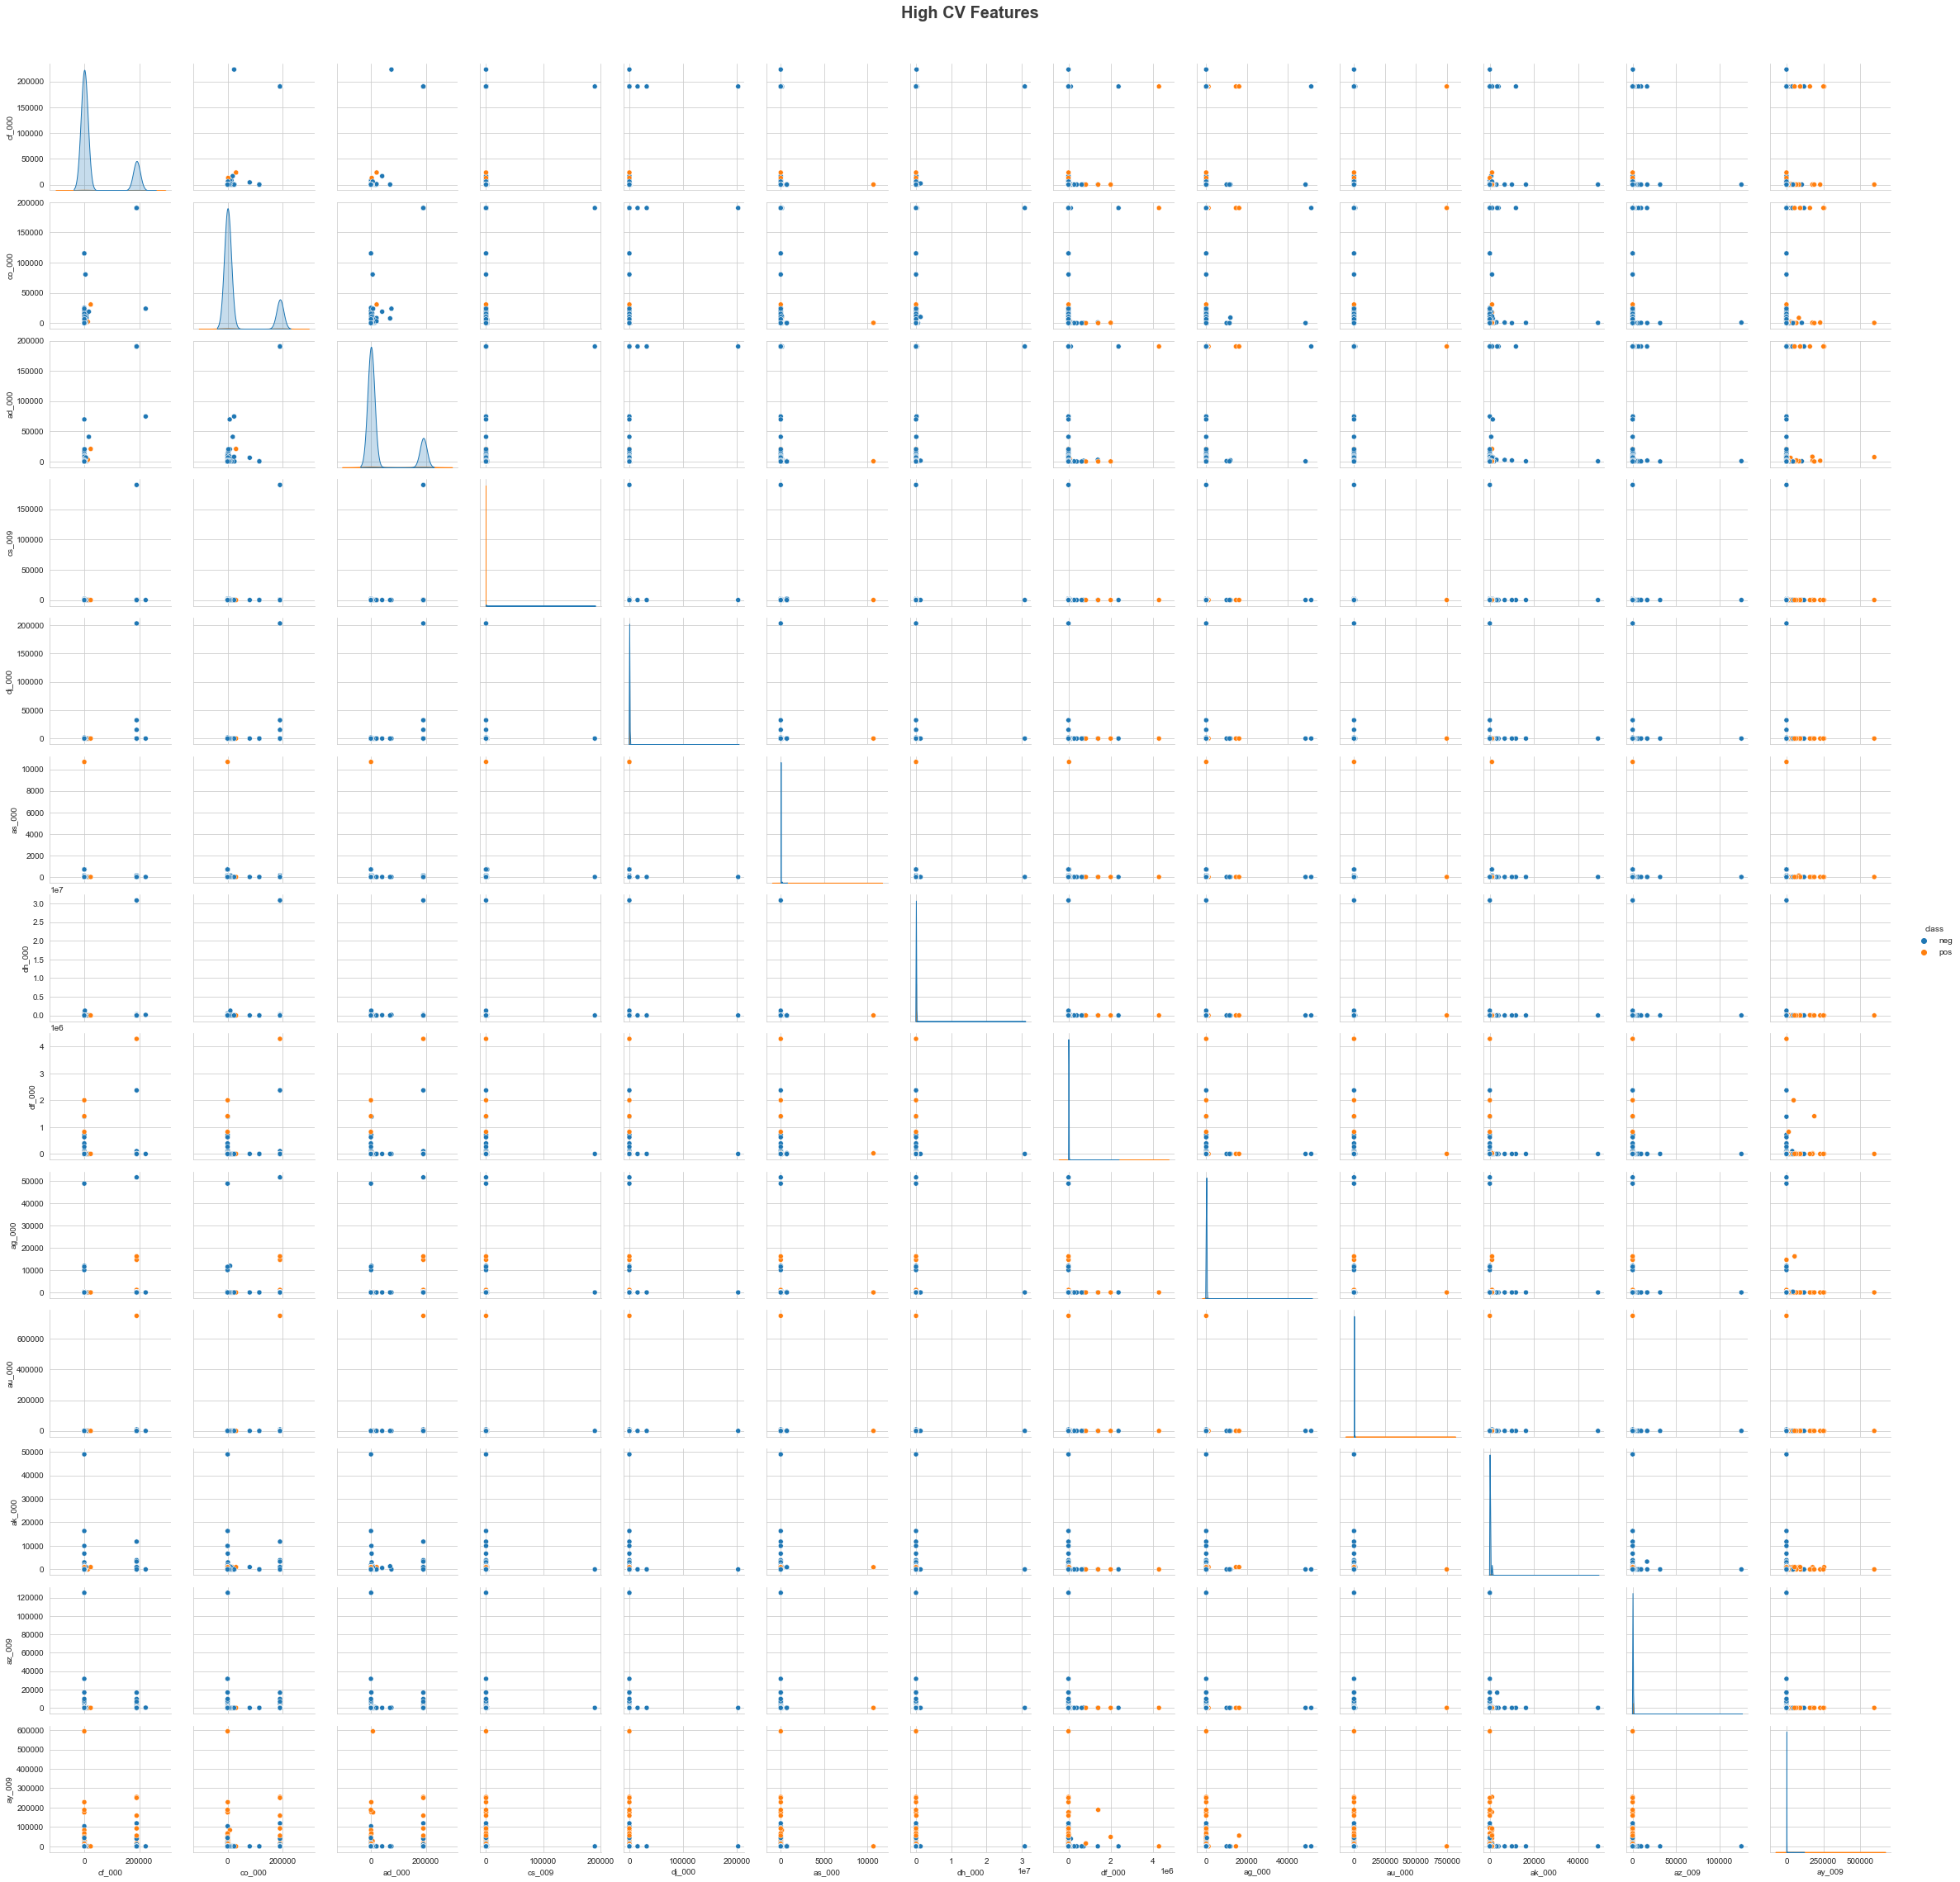

In [198]:
df_class = np.concatenate((aps_train["class"],aps_test["class"]), axis = 0)
df_class = pd.DataFrame(df_class,columns=["class"])

df_imputed["class"]=df_class["class"]
plt.close()
sns.set_style("whitegrid")
splot = sns.pairplot(df_imputed[list(high_cv_features)+["class"]].sample(frac=0.1),hue="class")

# Title Styles
splot.fig.subplots_adjust(top=0.95)
splot.fig.suptitle('High CV Features', fontsize=20, alpha = 0.9, weight = 'bold')
plt.show()

#### __Can you draw conclusions about significance of those features, just by the scatter plots?__

No, It's hard to make conclusions about significance of those features, just by eyeballing the scatter plots.

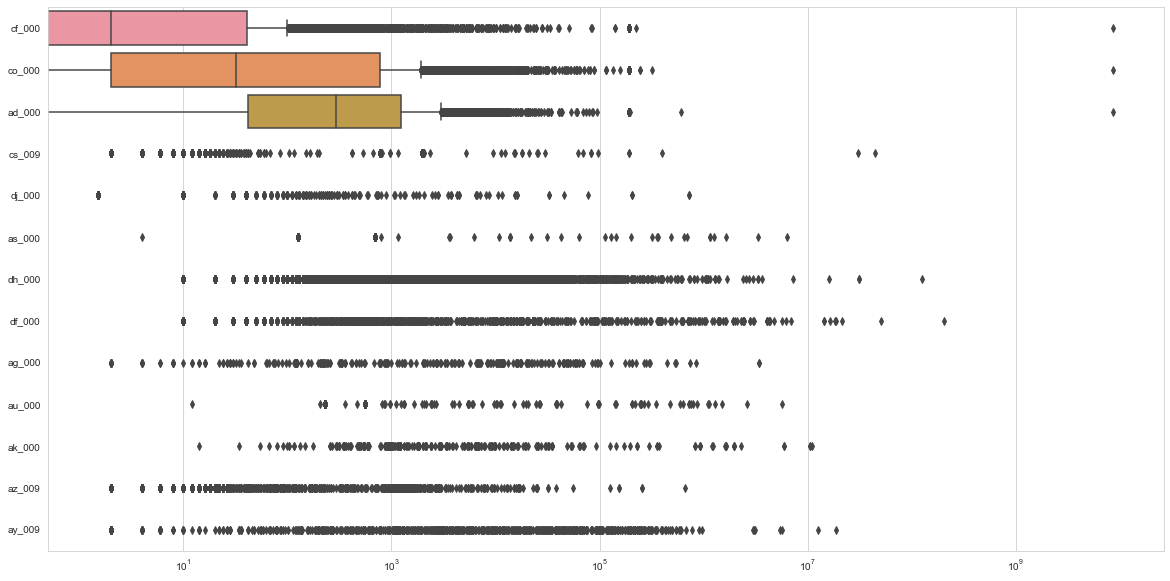

In [199]:
plt.close()
fig, ax = plt.subplots(figsize=(20,10))
boxplot = sns.boxplot(ax= ax, data=df_imputed[high_cv_features], orient='h')
boxplot.set(xscale="log")
plt.show()

### __v. Determine the number of positive and negative data. Is this data set imbalanced?__

In [200]:
print(' Positive and Negatives in Training data')
aps_train_Y.value_counts()

 Positive and Negatives in Training data


neg    59000
pos     1000
Name: class, dtype: int64

In [201]:
print('Positive and Negatives in Testing data')
aps_test_Y.value_counts()

Positive and Negatives in Testing data


neg    15625
pos      375
Name: class, dtype: int64

- ##### __Yes, both train and test datasets are heavily imbalanced.__

### __(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forest and compare it to the test error.__

In [202]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
def roc_auc(data_X, data_Y, model, data_type):
    prob = model.predict_proba(data_X)
    
    fpr, tpr, thresholds = roc_curve(data_Y, prob[:, 1], pos_label='pos')
    roc_auc = auc(fpr, tpr)

    plt.close()
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, 'b', label="Area Under Curve(AUC): {}".format(roc_auc))
    plt.plot([0,1], [0,1], 'k--')

    plt.title('ROC Curve for {} data'.format(data_type))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend(loc = 'lower right')
    plt.grid()
    plt.show()

In [203]:
def metrics(data_Y, predict):
    matrix = confusion_matrix(data_Y, predict)
    accuracy = accuracy_score(data_Y, predict)
    
    return matrix, accuracy

In [204]:
# Random forest model which is imbalanced
RandomForest_model = RandomForestClassifier(max_depth=5, random_state=7, n_jobs = -1, oob_score=True)
RandomForest_model.fit(aps_train_X, aps_train_Y)

predict = RandomForest_model.predict(aps_train_X)

matrix, accuracy = metrics(aps_train_Y, predict)
print('Confusion Matrix of Train Data - Imbalanced Data')
print(matrix)
# train_error = 1 - accuracy_score(aps_train_Y, predict)
# print("The train error is: ",train_error )
print('Train Classification Accuracy : ', accuracy)

Confusion Matrix of Train Data - Imbalanced Data
[[58969    31]
 [  451   549]]
Train Classification Accuracy :  0.9919666666666667


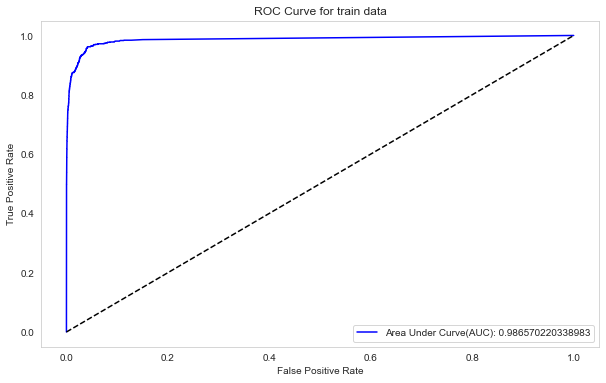

In [205]:
roc_auc(aps_train_X, aps_train_Y, RandomForest_model, 'train')

In [206]:
# Random forest model which is imbalanced
predict = RandomForest_model.predict(aps_test_X)

matrix, accuracy = metrics(aps_test_Y, predict)
print('Confusion Matrix of Test Data - Imbalanced Data')
print(matrix)
print('Test Classification Accuracy : ', accuracy)
# test_error = 1 - accuracy_score(aps_test_Y, predict)
# print("The test error is: ",test_error )

Confusion Matrix of Test Data - Imbalanced Data
[[15611    14]
 [  182   193]]
Test Classification Accuracy :  0.98775


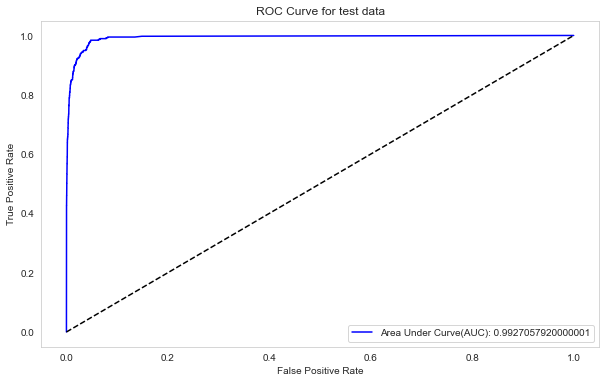

In [207]:
roc_auc(aps_test_X, aps_test_Y, RandomForest_model, 'test')

In [208]:
print('Out of Bag error estimate for our random forest model : ', 1-RandomForest_model.oob_score_)
print('Test Error : ', 1 - accuracy)

Out of Bag error estimate for our random forest model :  0.009183333333333321
Test Error :  0.012249999999999983


- The OOB error is little lower than Test error. OOB is much better to evaluate our model as compare to training error. As it overfits and give very high accuracy.


### __(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.__

In [209]:
# Random forest model, balanced
RandomForest_model_balanced = RandomForestClassifier(max_depth=5, random_state=7, n_jobs = -1, 
                                            oob_score=True, class_weight='balanced')
RandomForest_model_balanced.fit(aps_train_X, aps_train_Y)

predict = RandomForest_model_balanced.predict(aps_train_X)

matrix, accuracy = metrics(aps_train_Y, predict)
print('Confusion Matrix of Train Data - Imbalanced Data')
print(matrix)
print('Train Classification Accuracy : ', accuracy)

Confusion Matrix of Train Data - Imbalanced Data
[[56619  2381]
 [   29   971]]
Train Classification Accuracy :  0.9598333333333333


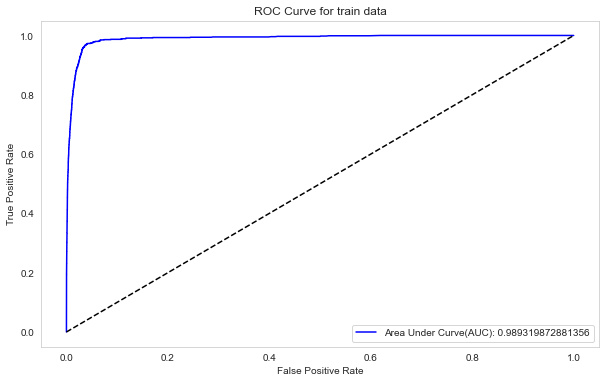

In [210]:
roc_auc(aps_train_X, aps_train_Y, RandomForest_model_balanced, 'train')

In [211]:
# dataset predict
predict = RandomForest_model_balanced.predict(aps_test_X)
matrix, accuracy = metrics(aps_test_Y, predict)
print('Confusion Matrix of Test Data - Imbalanced Data')
print(matrix)
print('Test Classification Accuracy : ', accuracy)

Confusion Matrix of Test Data - Imbalanced Data
[[15021   604]
 [   14   361]]
Test Classification Accuracy :  0.961375


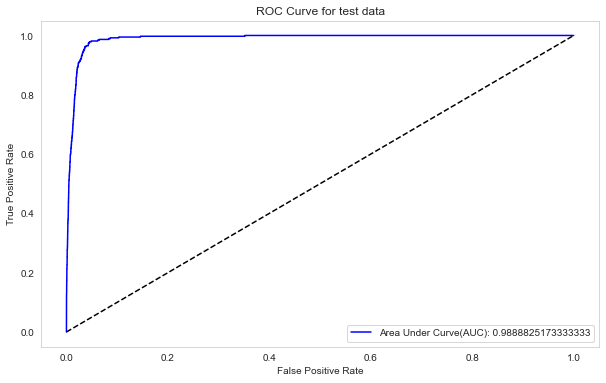

In [212]:
roc_auc(aps_test_X, aps_test_Y, RandomForest_model_balanced, 'test')

In [213]:
print('Out of Bag error estimate for our random forest model : ', 1-RandomForest_model_balanced.oob_score_)
print('Test Error : ', 1 - accuracy)

Out of Bag error estimate for our random forest model :  0.04146666666666665
Test Error :  0.03862500000000002


Observation:
- Even the errors slightly incresed, we developed a model with more balanced data than 2c.
-  Having said that, as the negative (neg) samples are significantly more than positive (pos) samples, it is possible that the model tends to predict a sample as negative to reach a higher accuracy.

# __e)  XGBoost and Model Trees__


### __In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.__

### __One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.__

## __L1 penalized Logistic Regression with xgboost__

In [214]:
#alphas = [5.0 ** i for i in range(-5, 5)]
alphas={'humera':[0.00032, 0.0016, 0.008, 0.04, 0.2, 1, 5, 25, 125, 625]}

k_fold_cv = KFold(n_splits=7)

xgb_model = xgb.XGBClassifier(objective="reg:logistic",n_estimators=5,verbosity=0, use_label_encoder =False)

xgb_model.fit(aps_train_X, aps_train_Y,eval_set=[(aps_train_X, aps_train_Y)],eval_metric='logloss')

cv_model=GridSearchCV(xgb_model,alphas,cv=k_fold_cv, n_jobs=1, scoring='roc_auc',verbose=0)

cv_model.fit(aps_train_X,aps_train_Y)

[0]	validation_0-logloss:0.600876
[1]	validation_0-logloss:0.526394
[2]	validation_0-logloss:0.463522
[3]	validation_0-logloss:0.410472
[4]	validation_0-logloss:0.365216


GridSearchCV(cv=KFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(n_estimators=5, objective='reg:logistic',
                                     use_label_encoder=False, verbosity=0),
             n_jobs=1,
             param_grid={'humera': [0.00032, 0.0016, 0.008, 0.04, 0.2, 1, 5, 25,
                                    125, 625]},
             scoring='roc_auc')

In [215]:
xgb_model = xgb.XGBClassifier(objective='reg:logistic',n_estimators=5,verbosity=0,random_state=0,reg_alpha=cv_model.best_params_['humera'])

xgb_model.fit(aps_train_X, aps_train_Y,eval_set=[(aps_train_X, aps_train_Y)],eval_metric='logloss')

cv_model.best_score_

[0]	validation_0-logloss:0.600876
[1]	validation_0-logloss:0.526394
[2]	validation_0-logloss:0.463522
[3]	validation_0-logloss:0.410472
[4]	validation_0-logloss:0.365216


0.9368435075802182

In [216]:
predict = xgb_model.predict(aps_train_X)

matrix, accuracy = metrics(aps_train_Y, predict)
print('Confusion Matrix of Train Data - Imbalanced Data')

print(matrix)
print('Train Accuracy : ', accuracy)

print('Train Error using XGBoost : ', 1-accuracy)

Confusion Matrix of Train Data - Imbalanced Data
[[58903    97]
 [  494   506]]
Train Accuracy :  0.99015
Train Error using XGBoost :  0.009850000000000025


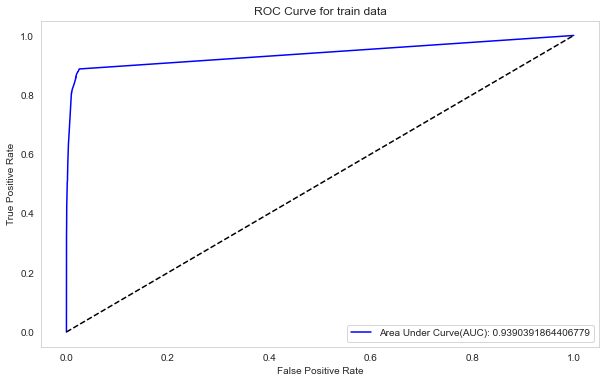

In [217]:
roc_auc(aps_train_X, aps_train_Y, xgb_model, 'train')

In [218]:
predict = xgb_model.predict(aps_test_X)

matrix, accuracy = metrics(aps_test_Y, predict)
print('Confusion Matrix of Test Data - Imbalanced Data')

print(matrix)
print('Test Classification Accuracy : ', accuracy)

print('Test Error : ', 1 - accuracy)

Confusion Matrix of Test Data - Imbalanced Data
[[15600    25]
 [  200   175]]
Test Classification Accuracy :  0.9859375
Test Error :  0.014062499999999978


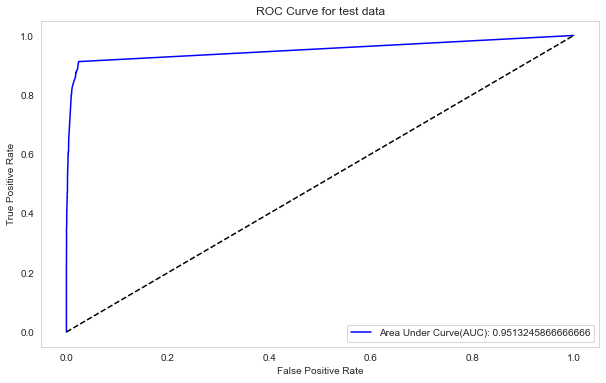

In [219]:
roc_auc(aps_test_X, aps_test_Y, xgb_model, 'test')

## __f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.4 Train XGBosst with L1-penalized lo- gistic regression at each node using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.__

In [220]:
#Smote instance
from pickletools import read_int4
smote = SMOTE(random_state=11)
#pipeline with xgboost L1 penalized logistic regression
pipeline = imbpipeline(steps = [['smote', smote],
                                ['scaler', MinMaxScaler()],
                                ['classifier', xgb.XGBClassifier(objective="binary:logistic",n_estimators=5,verbosity=0)]])
#Stratified k fold ( 5 splits )
stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)      
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]} # Alpha
print(param_grid)
#Gridsearch CV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)
# Fit the model 
grid_search.fit(aps_train_X, aps_train_Y)
# Best score
cv_score = grid_search.best_score_
#Test score
test_score = grid_search.score(aps_test_X, aps_test_Y)
print(f'\nCross-validation score: {cv_score}\nTest score: {test_score}')

{'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

Cross-validation score: 0.9738549152542373
Test score: 0.9850838186666666


In [221]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',n_estimators=5,verbosity=0,random_state=0,reg_alpha=grid_search.best_params_['classifier__C'])
xgb_model.fit(aps_train_X, aps_train_Y,eval_set=[(aps_train_X, aps_train_Y)],eval_metric='logloss')

[0]	validation_0-logloss:0.600876
[1]	validation_0-logloss:0.526395
[2]	validation_0-logloss:0.463522
[3]	validation_0-logloss:0.410472
[4]	validation_0-logloss:0.365216


XGBClassifier(n_estimators=5, reg_alpha=0.001, verbosity=0)

In [222]:
predict = xgb_model.predict(aps_train_X)

matrix, accuracy = metrics(aps_train_Y, predict)
print('Confusion Matrix of Train Data - Imbalanced Data')
print(matrix)
print('Train Classification Accuracy : ', accuracy)


print('Train Error using XGBoost : ', 1-accuracy)

Confusion Matrix of Train Data - Imbalanced Data
[[58903    97]
 [  494   506]]
Train Classification Accuracy :  0.99015
Train Error using XGBoost :  0.009850000000000025


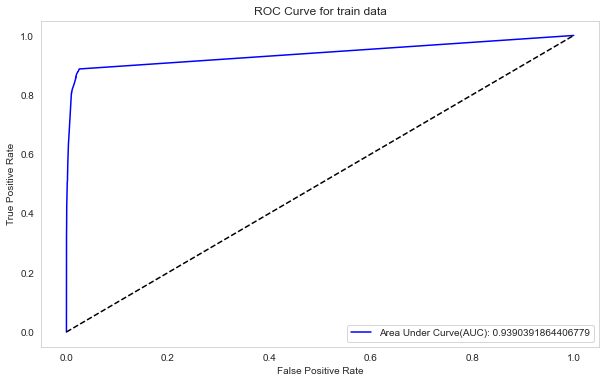

In [223]:
roc_auc(aps_train_X, aps_train_Y, xgb_model, 'train')

In [224]:
predict = xgb_model.predict(aps_test_X)

matrix, accuracy = metrics(aps_test_Y, predict)
print('Confusion Matrix of Test Data - Imbalanced Data')
print(matrix)

print('Test Classification Accuracy : ', accuracy)

print('Test Error : ', 1 - accuracy)

Confusion Matrix of Test Data - Imbalanced Data
[[15600    25]
 [  200   175]]
Test Classification Accuracy :  0.9859375
Test Error :  0.014062499999999978


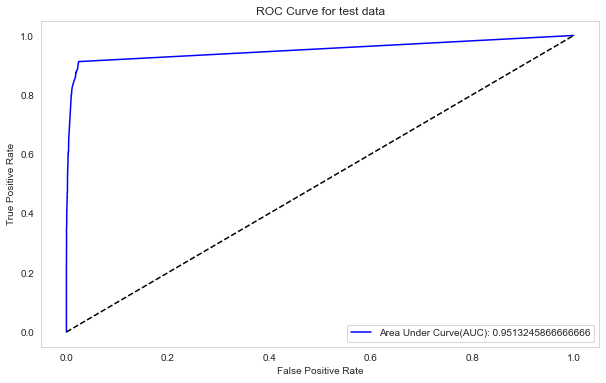

In [225]:
roc_auc(aps_test_X, aps_test_Y, xgb_model, 'test')

# __2. ISLR 6.6.3__

#### __(a) As we increase s from 0, the training RSS will: i. Increase initially, and then eventually start decreasing in an inverted U shape. ii. Decrease initially, and th`men eventually start increasing in a U shape. iii. Steadily increase. iv. Steadily decrease. v. Remain constant.__

Ans: (iv) Steadily decrease because, As s increases the constraint on beta decreases and the RSS reduces until we reach the OLS value. Thus, the traning RSS will steadily decrease to ordinary least square RSS.

#### __(b) Repeat (a) for test RSS.__

Ans: (ii) Decrease initially, and then eventually start increasing when it reaches maximum point. Along with the growth of $s$, the values of estimated coefficients will gradually go non-zero. That means the the number of predictors increase's and the model becomes more flexible, the test RSS decreases until a point and then starts to become more overfit.

#### __(c) Repeat (a) for variance.__



Ans: (iii) Steadily increase because $\beta$'s are almost all zero at the beginning. There is almost no variance at the beginning stage. After the model becoming flexible, the variance will increase as the model flexibility increases, variance also increases.

#### __(d) Repeat (a) for (squared) bias. As stated above with increase in s there is decrease in shrinkage. And the model's flexibility increases and bias decreases.__

Ans: (iv) Steadily decrease because bias is opposite to variance according to bias-variance trade-off.

#### __e) Repeat (a) for the irreducible err__



Ans: (v) Remains constant because the model is independent of irreducible error,  it is irrelevant with s.

# __3. ISLR 6.6.5__

# __4. ISLR 8.4.5__

**Majority Voting**
- Sum(Red) =6> sum(Green) = 4 = Red
- Red samples has a larger number than green samples. Thus, X is classified as red.

**Average probability**
- P(Class is Red | X) is 4.5/10 = 0.45 <0.5 . Thus, X is classified as green

# __5. ISLR 9.7.3__

In [226]:
sample_dict = pd.DataFrame({'X1' : [3, 2, 4, 1, 2, 4, 4],  'X2' : [4, 2, 4, 4, 1, 3, 1], 'Y' : ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})
# sample_df = pd.DataFrame.from_dict(sample_dict)
sample_dict

,X1,X2,Y
0,3,4,red
1,2,2,red
2,4,4,red
3,1,4,red
4,2,1,blue
5,4,3,blue
6,4,1,blue


In [227]:
input_X = sample_dict.drop(columns= 'Y')
input_y = sample_dict['Y']

In [228]:
# create svm model
clf = SVC(kernel='linear', C=10000)
clf.fit(input_X, input_y)

SVC(C=10000, kernel='linear')

In [229]:
input_X.iloc[:, 0]

0    3
1    2
2    4
3    1
4    2
5    4
6    4
Name: X1, dtype: int64

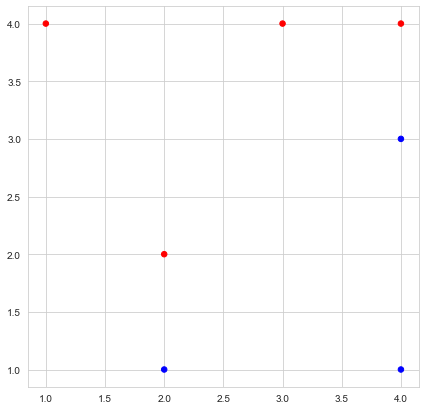

In [230]:
# plot graph
fig, ax = plt.subplots(figsize=(7, 7))
# scatter plot of sample points
ax.scatter(input_X.iloc[:, 0], input_X.iloc[:, 1], c=input_y, s=30, cmap=plt.cm.Paired)
# create a grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

(b) The solid black lines is the hyperplane.

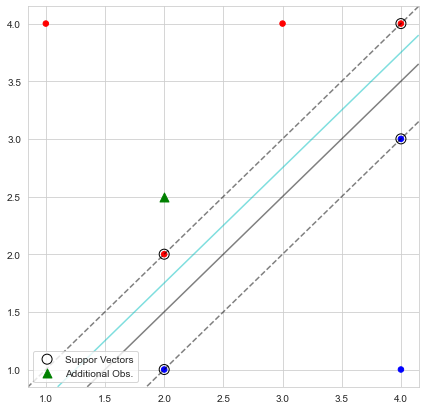

In [231]:
# plot graph
fig, ax = plt.subplots(figsize=(7, 7))

# scatter plot of sample points
ax.scatter(input_X.iloc[:, 0], input_X.iloc[:, 1], c=input_y, s=30, cmap=plt.cm.Paired)


# create a grid
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# hyperplane
lines1 = ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], label="Decision Boundary")

# support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', label="Suppor Vectors")

# Hyperplane which is not optimal
lines2 = ax.contour(XX, YY, Z - 0.5, colors='c', levels=[0], alpha=0.5, linestyles=['-'], lw = 3)

# Obs that makes two classes not linearly seprable
ax.scatter([2.0], [2.5], color='g', marker='^', s = 80, label="Additional Obs.")

ax.legend()
plt.show()


(c) We can see, the parameters are approximately:

$
\beta_0 = 1 \\ \beta_1 = -2 \\ \beta_2 = 2 \\
\beta_0 + \beta_1 X_1 + \beta_2 X_2 > 0 \Rightarrow red, else \Rightarrow blue
$

(d) The dash lines indicates the maximal margin

(e) The circeled ones are support vectors.

(f) The seventh point is not a support vector as it is far away from the maximal margin hyperplane. If it is on the edge of decision boundary, it will have effects but it does not.

(g) The solid cyan line in the above diagram

(h) The new point marked as green triangle in the above diagram. This make the points form an XOR pattern which is not linear-separable.

__References and citations:__

1. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer.fit_transform
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
4. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter        
5. https://xgboost.readthedocs.io/en/stable/parameter.html       
6. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#imblearn.over_sampling.SMOTE
7. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
8. https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
9. http://piti118.github.io/babar_python_tutorial/notebooks/03_Multivariate_Analysis.html